In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


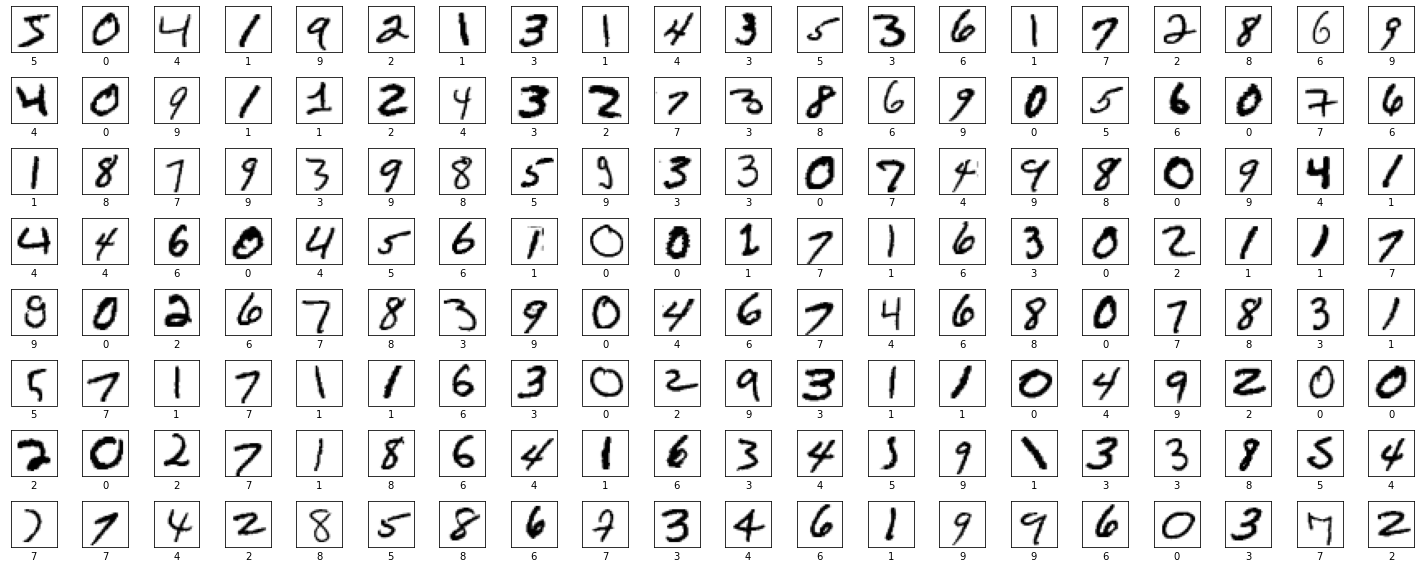

In [ ]:
ROWS = 8
COLS = 20
i = 0

plt.figure(figsize=(20,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [ ]:
#reshape
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train, x_test = x_train / 255.0, x_test / 255.0   

In [ ]:
  model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [ ]:
#model.compile(
    #optimizer='adam', 
    #loss='sparse_categorical_crossentropy', 
    #metrics=['accuracy']
#)

In [ ]:
# model.compile(
 #    optimizer='SGD', 
  #   loss='sparse_categorical_crossentropy', 
   # metrics=['accuracy']
#)

In [ ]:
 model.compile(
     optimizer='RMSProp', 
     loss='sparse_categorical_crossentropy', 
     metrics=['accuracy']
 )

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2248 - accuracy: 0.9315 - val_loss: 0.0853 - val_accuracy: 0.9740
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0638 - val_accuracy: 0.9808
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0390 - val_accuracy: 0.9895
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0509 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0511 - val_accuracy: 0.9856
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0566 - val_accuracy: 0.9856
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0225 - accuracy: 0.9941 - val_loss: 0.0447 - val_ac

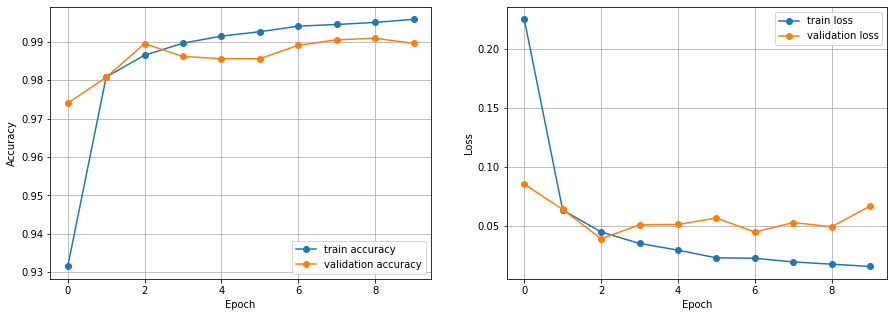

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9899

Test Accuracy: 0.9898999929428101

Test Loss: 0.05523671954870224


In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[1]

array([1.4744489e-12, 1.1891322e-18, 1.0000000e+00, 4.4605432e-21,
       2.0092602e-20, 1.0731065e-28, 1.3305399e-20, 1.3208683e-16,
       2.5703339e-20, 1.4692207e-21], dtype=float32)

In [ ]:
np.argmax(predictions[1])

2

In [ ]:
x_train=x_train=x_train.reshape(-1,28,28)
x_test=x_test=x_test.reshape(-1,28,28)

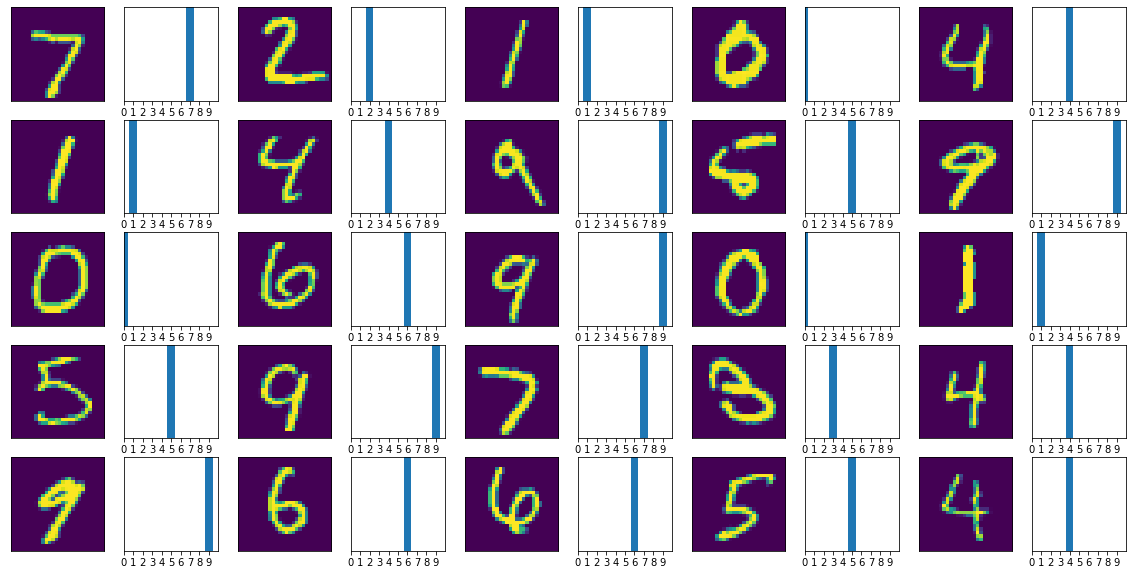

In [ ]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])

        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()
